In [27]:
from PIL import Image
from pytesseract import pytesseract
import re

In [74]:
from PIL import Image
import pytesseract
import pandas as pd
import numpy as np
import re

def get_text(img):
    # path_to_tesseract = r"tesseract"
    img = Image.open(img)
    # pytesseract.tesseract_cmd = path_to_tesseract
    text = pytesseract.image_to_string(img)
    return text[:-1]


## Getting the whole dataframe
ingredient_file_path='../Emission_computing/final_ingredients_emissions.csv'
df=pd.read_csv(ingredient_file_path,error_bad_lines=False)

def parse_menu(text):
    
## Splitting every line
    string_list=[x for x in text.split("\n") if len(x)!=0]
    
    final_dict={'Dish':[],"ingredient_from_df":[], 'g/CO2 emitted/kg':[]}
    
    for line in string_list:
        ## Removing the metacharacters and the names
        line=line.lower()
        line=re.sub('[^A-Za-z0-9]+', ' ', line)
        line=re.sub(r'[0-9]+', '', line)
        ingredient_words=re.split('\s+', line)
        for ingredient in ingredient_words:
            if df[df['ingredient'].str.match(r''+str(ingredient)+'$')==True].ingredient.values.size>0:
                final_dict['ingredient_from_df'].append(df[df['ingredient'].str.match(r''+str(ingredient)+'$')== True].ingredient.iloc[0])
                final_dict['g/CO2 emitted/kg'].append(df[df['ingredient'].str.match(r''+str(ingredient)+'$')== True].emissions.iloc[0])
                final_dict["Dish"].append(line)

    final_df=pd.DataFrame(final_dict)
    final_df['Dish']=final_df['Dish'].astype(str)
    
    result=final_df.groupby('Dish', as_index=False).sum().sort_values(by="g/CO2 emitted/kg",ascending=True)
    result=result.reset_index()
    result=result.drop(columns=['index'])
    result["g/CO2 emitted/kg"]=np.floor(result["g/CO2 emitted/kg"])
    
    return result
    

/home/mateo/.pyenv/versions/3.8.12/envs/FritzWebInterface/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
img_file="../MS-Online-Menu-Mains-January.jpg"
menu_image=Image.open(img_file)

In [76]:
df_result=parse_menu(get_text(img_file))

In [84]:
emission=df_result[df_result['g/CO2 emitted/kg']==df_result['g/CO2 emitted/kg'].min()].iloc[0,1]
recipe_result=df_result[df_result['g/CO2 emitted/kg']==df_result['g/CO2 emitted/kg'].min()].iloc[0,0].capitalize()

In [98]:
df_result.transpose().index()

TypeError: 'Index' object is not callable

In [92]:
import matplotlib.pyplot as plt

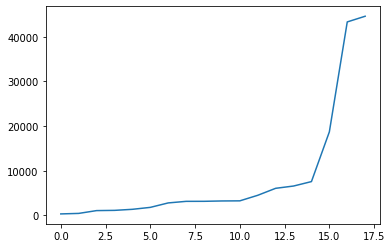

In [95]:
plt.plot(df_result['g/CO2 emitted/kg'])